In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import os
os.environ['R_HOME'] = r'C:\Program Files\R\R-4.4.3'
os.environ['PATH'] += r';C:\Program Files\R\R-4.4.3\bin'
import rpy2.robjects as robjects
import rpy2.robjects as ro

In [9]:
##Importation des données en python##
file_path = "C:\\Users\\jules\\OneDrive\\Documents\\MathsAppli\\PROJET BAYES\\Toutes les données\\Data\\vol2\\birats\\birats.data.R"
# Vérifier le chemin
if os.path.exists(file_path):
    print("Le fichier existe :", os.path.exists(file_path))
else:
    print("Fichier introuvable :", os.path.exists(file_path))

#Charger et exécuter le script R
robjects.r.source(file_path)

#On récupère les objets du scripts
N = robjects.r['N']
T = robjects.r['T']
x = robjects.r['x']
y = np.array(ro.r.matrix(robjects.r['y'], nrow=30))
xbar = robjects.r['xbar']
omega = robjects.r['Omega']

print(N)
print(T)
print(x)
print(y)
print(xbar)

Le fichier existe : True
[1] 30

[1] 5

[1]  8 15 22 29 36

[[151. 199. 246. 283. 320.]
 [145. 199. 249. 293. 354.]
 [147. 214. 263. 312. 328.]
 [155. 200. 237. 272. 297.]
 [135. 188. 230. 280. 323.]
 [159. 210. 252. 298. 331.]
 [141. 189. 231. 275. 305.]
 [159. 201. 248. 297. 338.]
 [177. 236. 285. 350. 376.]
 [134. 182. 220. 260. 296.]
 [160. 208. 261. 313. 352.]
 [143. 188. 220. 273. 314.]
 [154. 200. 244. 289. 325.]
 [171. 221. 270. 326. 358.]
 [163. 216. 242. 281. 312.]
 [160. 207. 248. 288. 324.]
 [142. 187. 234. 280. 316.]
 [156. 203. 243. 283. 317.]
 [157. 212. 259. 307. 336.]
 [152. 203. 246. 286. 321.]
 [154. 205. 253. 298. 334.]
 [139. 190. 225. 267. 302.]
 [146. 191. 229. 272. 302.]
 [157. 211. 250. 285. 323.]
 [132. 185. 237. 286. 331.]
 [160. 207. 257. 303. 345.]
 [169. 216. 261. 295. 333.]
 [157. 205. 248. 289. 316.]
 [137. 180. 219. 258. 291.]
 [153. 200. 244. 286. 324.]]
[1] 22



In [10]:
data = {
    "nb_rats": int(N[0]),
    "days": x,
    "nb_days": int(T[0]),
    "tab" : y,
    "xbar" : int(xbar[0]),
    "omega" : omega
}

In [15]:
def birats(nchain, data, hyper_prior, init) :
    
    #On récupère les données
    nb_rats = data['nb_rats']
    tab = data["tab"]
    days = data['days']
    nb_days = data['nb_days']

    #On récupère les hyperparamètres
    sigma_2_c = 1/hyper_prior[0]
    mu_b = hyper_prior[1]
    omega = hyper_prior[2]

    #Initialisation de la chaine
    chain = np.zeros((nchain + 1, nb_rats, 2))
    chain[0,:] = init

    #Vecteur des données [1 , X_j]
    X_tilde = np.array([[1, day] for day in days])
    print(X_tilde)
    
    #Inverse de omega
    omega_inv = np.linalg.inv(omega)

    for t in range(nchain) :
        ##Etat actuel
        current = chain[t,:,:]

         ##Mise à jour des beta_i
        for i in range(nb_rats) :

            A =  omega_inv + np.sum([np.dot(X_tilde[j], X_tilde[j]) for j in range(nb_days)]) * (1 / sigma_2_c)
            B =  np.dot(mu_b.T, omega_inv) + np.sum([np.dot(tab[i, j], X_tilde[j]) for j in range(nb_days)]) * (1 / sigma_2_c)

            c = np.dot(np.linalg.inv(A), B.T)

            print(c)
            print(A)

            current[i] = np.random.multivariate_normal(c, A)

        chain[t+1,:,:] = current    

    return chain

In [17]:
nb_rats = data['nb_rats']
tab = data["tab"]
days = data['days']
xbar = data['xbar']
nb_days = data['nb_days']

hyper_prior = [0.1, np.array([250, 5]), np.array(data['omega'])]
init = np.array([[(1/nb_rats)*sum([tab[i][2] for i in range(nb_rats)]), 5] for j in range(nb_rats)])

print(init)

chain = birats(1000, data, hyper_prior, init)

[[245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]
 [245.03333333   5.        ]]
[[ 1.  8.]
 [ 1. 15.]
 [ 1. 22.]
 [ 1. 29.]
 [ 1. 36.]]
[ 249.75588536 -239.11464032]
[[491.5 291.5]
 [291.5 291.7]]
[ 249.756424

Text(0, 0.5, 'beta_1_2')

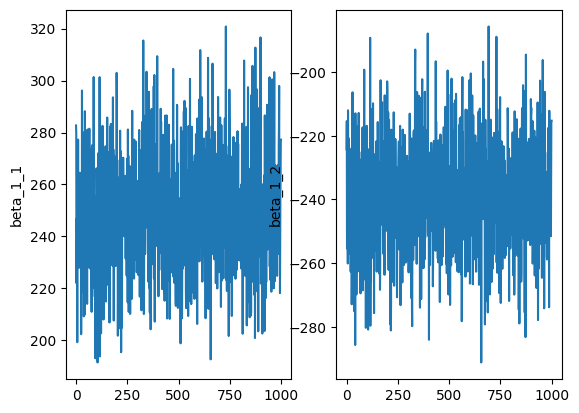

In [18]:
ylabs = ["beta_1_1", "beta_1_2"]

plt.subplot(1, 2, 1)
plt.plot(chain[:,0,0])
plt.ylabel(ylabs[0])

plt.subplot(1, 2, 2)
plt.plot(chain[:,0,1])
plt.ylabel(ylabs[1])